In [1]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

In [2]:
# read image into standard 2-d numpy array
hdu = fits.open("../diff_OVI30.fits")

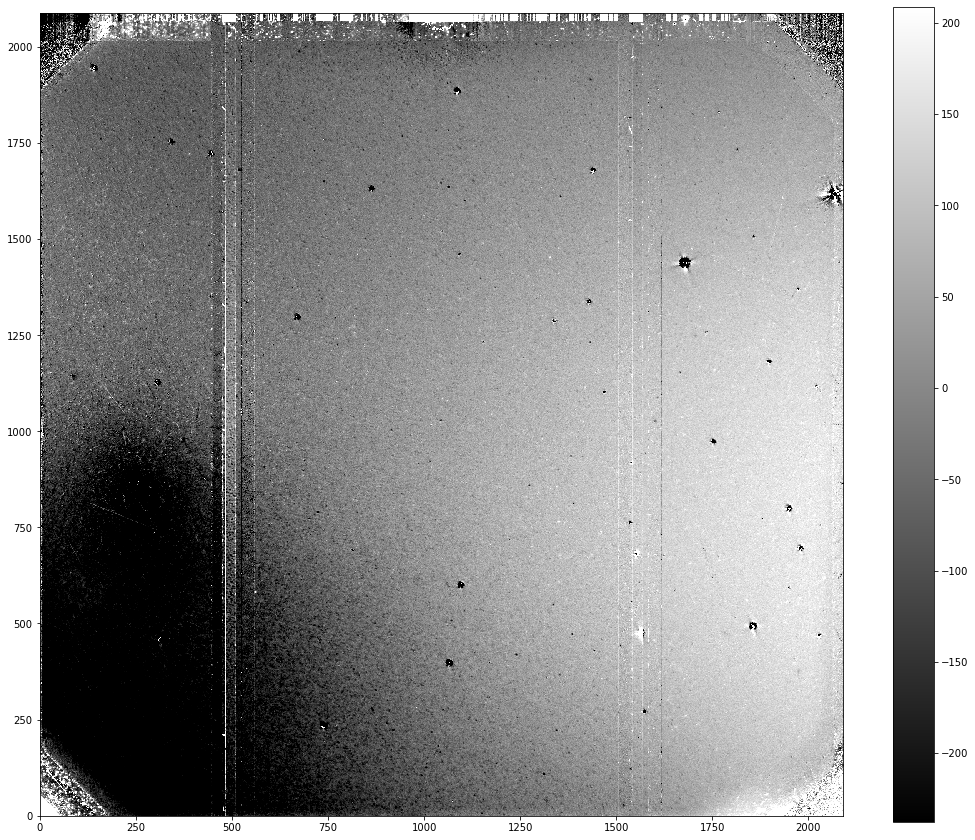

In [3]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
plt.imshow(hdu[0].data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
#plt.savefig("difference_Ha.jpg")

$\textbf{Object detection}$

In [4]:
#data1 = hdu1[0].data[0:-65,0:-50]
#len(data1)
# coverting in array
data = hdu[0].data[0:-80,20:-50].byteswap().newbyteorder()

In [5]:
try:
    objects = sep.extract(data, 200., err=None, mask=None, minarea=5, 
                                    filter_type='matched', deblend_nthresh=32, deblend_cont=0.005, clean=True, 
                                                          clean_param=1.0, segmentation_map=False)
except:
    print("Nathing to do")

In [6]:
# how many objects were detected
len(objects)

313

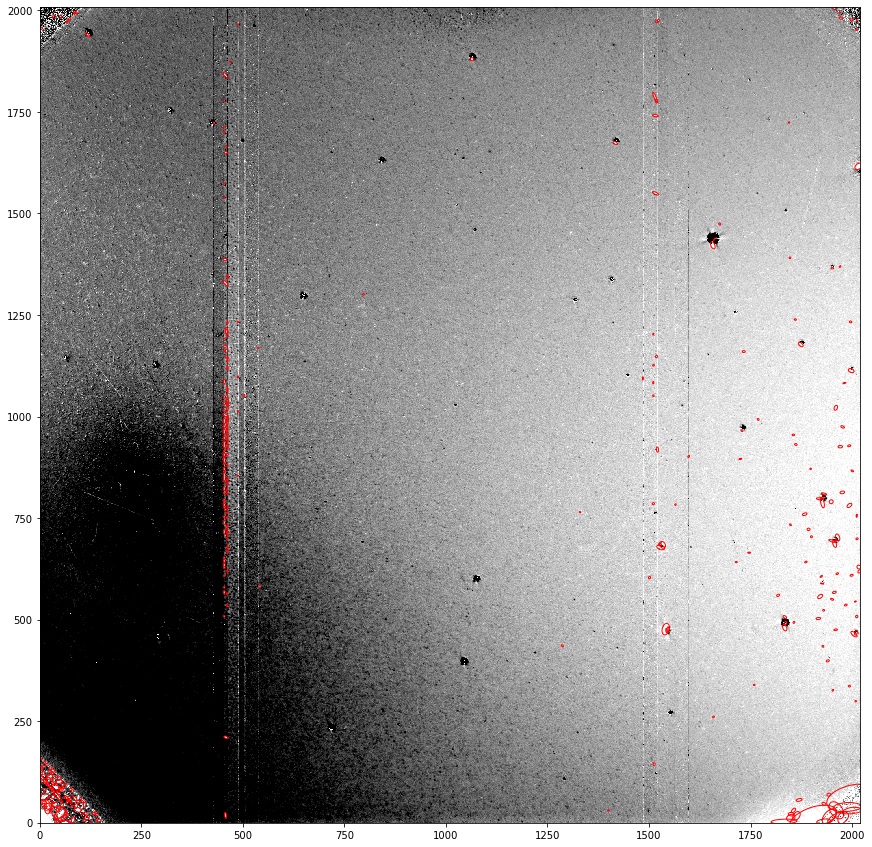

In [7]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
#plt.savefig("../difference_OVI-sources.jpg")

# Cuting images

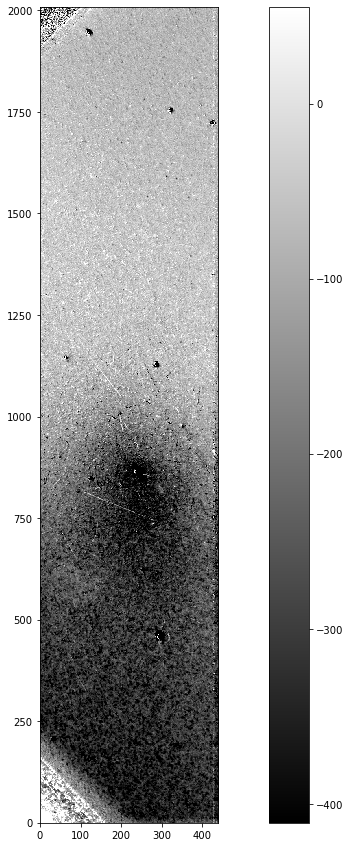

In [8]:
data_c1 = hdu[0].data[0:-80,20:460]#68:-50,559:-549
# show the image
m, s = np.mean(data_c1), np.std(data_c1)
plt.imshow(data_c1, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [9]:
data_c1 = data_c1.byteswap().newbyteorder()
try:
    objects_crop1 = sep.extract(data_c1, 200, err=None)
except:
    print("Nathing to do")

In [10]:
len(objects_crop1)

99

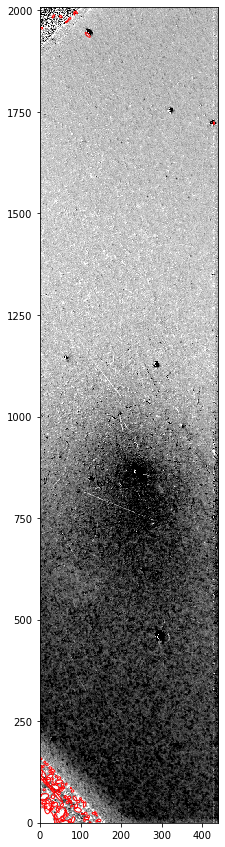

In [11]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_c1), np.std(data_c1)
im = ax.imshow(data_c1, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects_crop1)):
    e = Ellipse(xy=(objects_crop1['x'][i], objects_crop1['y'][i]),
                width=6*objects_crop1['a'][i],
                height=6*objects_crop1['b'][i],
                angle=objects_crop1['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

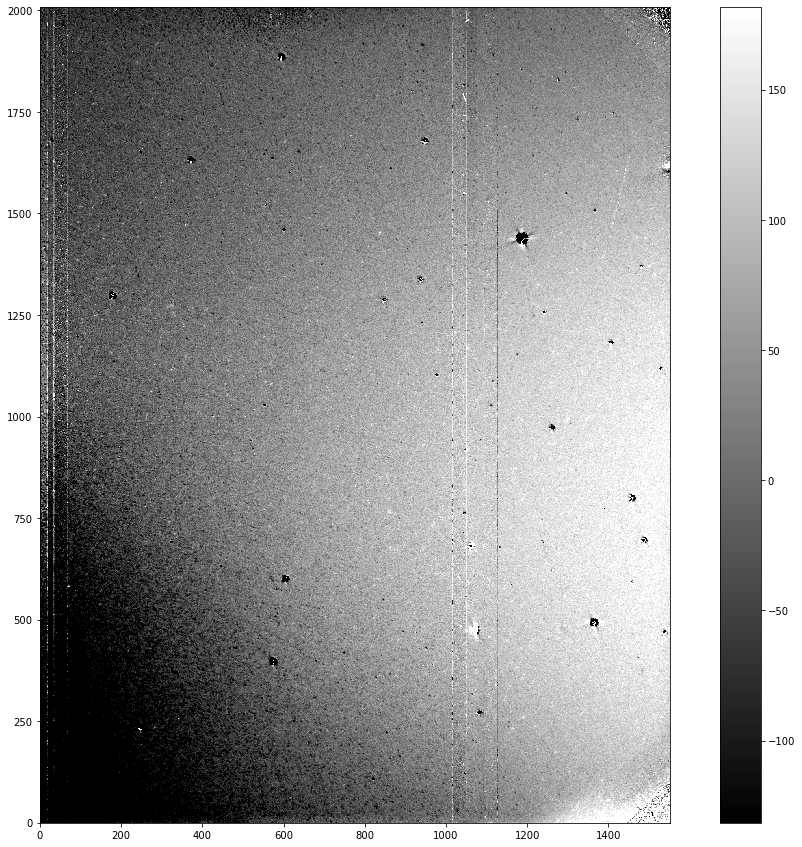

In [12]:
data_c2 = hdu[0].data[0:-80,490:-50]#68:-50,559:-549
# show the image
m, s = np.mean(data_c2), np.std(data_c2)
plt.imshow(data_c2, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [13]:
data_c2 = data_c2.byteswap().newbyteorder()
try:
    objects_crop2 = sep.extract(data_c2, 170, err=None)
except:
    print("Nathing to do")

In [14]:
len(objects_crop2)

172

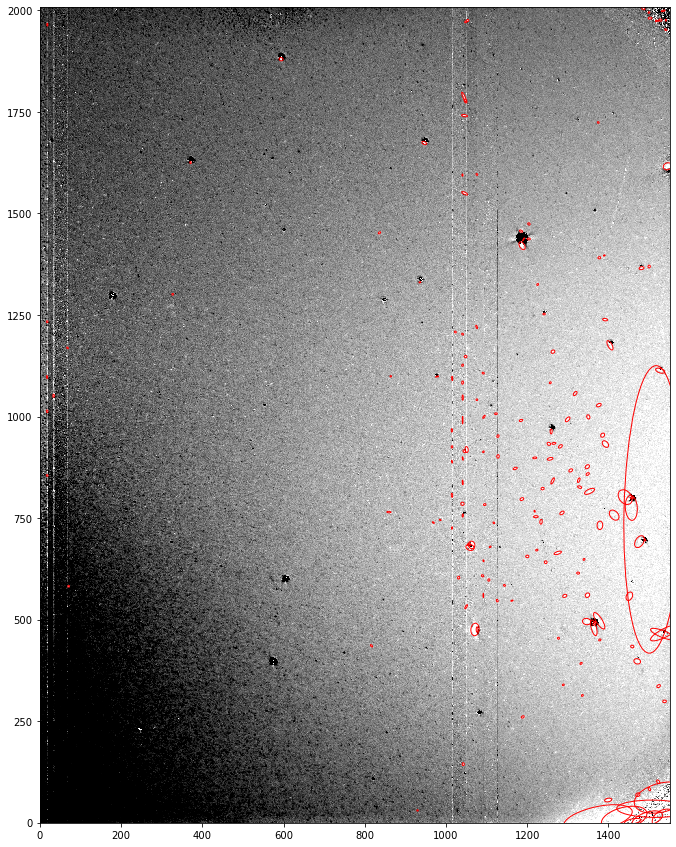

In [15]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_c2), np.std(data_c2)
im = ax.imshow(data_c2, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects_crop2)):
    e = Ellipse(xy=(objects_crop2['x'][i], objects_crop2['y'][i]),
                width=6*objects_crop2['a'][i],
                height=6*objects_crop2['b'][i],
                angle=objects_crop2['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

$\textbf{Creating DS9 regions}$

In [16]:
from astropy.wcs import WCS
mywcs = WCS(hdu[0].header)
newf = fits.PrimaryHDU()
newf.data = hdu[0].data[0:-80,20:460]
newf.header = hdu[0].header
newf.header.update(mywcs[0:-80,20:460].to_header())
mywcs_new1 = WCS(hdu[0].header)

rai, deci = [], []
x, y = objects_crop1['x'], objects_crop1['y']
for xi, yi in zip(x, y):
    ra, dec = mywcs_new1.all_pix2world([[xi, yi]], 0)[0]
    rai.append(ra)
    deci.append(dec)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [17]:
newf.data = hdu[0].data[0:-80,490:-50]
newf.header = hdu[0].header
newf.header.update(mywcs[0:-80,490:-50].to_header())
mywcs_new2 = WCS(hdu[0].header)

x2, y2 = objects_crop2['x'], objects_crop2['y']
for xii, yii in zip(x2, y2):
    ra, dec = mywcs_new2.all_pix2world([[xii, yii]], 0)[0]
    rai.append(ra)
    deci.append(dec)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [18]:
ID = []
for j in range(len(rai)):
    ID.append("S"+str(j)) 

In [19]:
tr, flux, flag = np.hstack((objects_crop1['thresh'], objects_crop2['thresh'])), np.hstack((objects_crop1['flux'], objects_crop2['flux'])), np.hstack((objects_crop1['flag'], objects_crop2['flag']))

In [20]:
xt, yt = np.hstack((objects_crop1['x'], objects_crop2['x'])), np.hstack((objects_crop1['y'], objects_crop2['y']))

In [21]:
arr = np.empty((len(rai), 7), dtype=np.float64)
arr.shape

(271, 7)

In [22]:
arr[:,0] = rai
arr[:,1] = deci
arr[:,2] = xt
arr[:,3] = yt
arr[:,4] = tr
arr[:,5] = flux
arr[:,6] = flag

In [23]:
from astropy.table import Table

t = Table(arr, names=('RA', 'DEC',  'x', 'y', 'thresh', 'flux', 'flag'), meta={'name': 'first table'})
t["ID"] = ID
Col = ["ID", 'RA', 'DEC', 'x', 'y', 'thresh', 'flux', 'flag']
t_new = t[Col]

In [24]:
t_new.write("../emitters/OVI30-candidates-sep.dat", format="ascii")

In [25]:
from catalog_utils import region_lines_from_table
regionfile = '../emitters/OVI30-candidates-sep.reg'
with open(regionfile, 'w') as f:
    f.write('\n'.join(region_lines_from_table(t, name='ID', ra='RA', dec='DEC', color='#aa22aa')))